<a href="https://colab.research.google.com/github/cmolinara-eng/Transferencia-de-Calor-con-Python-y-Matlab/blob/main/Conduccion_BiDimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conducción bidimensional estable

## Ejemplo 5.1.


Temperaturas [°C] (filas Z=1,2,3 m; columnas X=0, e/2, e):
[[75.   69.24 63.59]
 [75.   70.92 66.88]
 [75.   71.66 68.35]]

--- Resultados ---
α = 4.956e-06 m²/s
v_med = 0.1389 m/s,  v_max = 0.2083 m/s
Z* (Xpen=e) = 0.0105 m
q'_AS = 61173 W/m²,   Q_AS = 917602 W


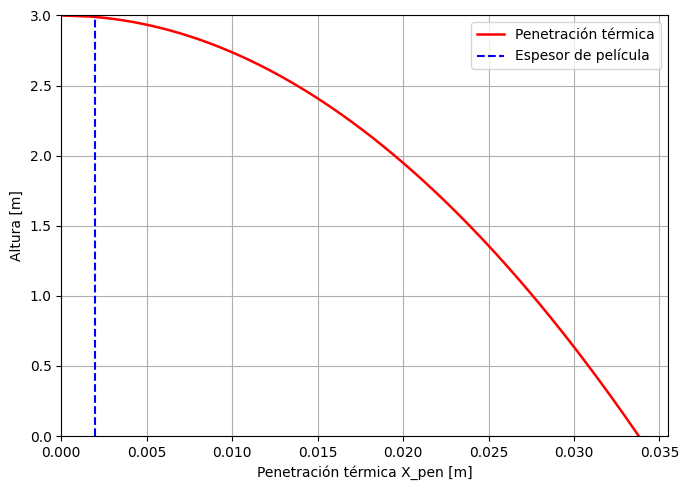

In [1]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
Ts  = 75.0             # Temperatura de la pared [°C]
T0  = 25.0             # Temperatura inicial del líquido [°C]
e   = 2e-3             #  [m]
b   = 5.0              # [m]
L   = 3.0              #  [m]
rho = 13412.0          # Densidad [kg/m³]
k   = 9.16             # Conductividad térmica [W/m·K]
Cp  = 137.8            # Calor específico [J/kg·K]
Qv  = 5/3600           # Caudal volumétrico [m³/s] (5 m³/h)


alpha = k / (rho * Cp)             # Difusividad térmica [m²/s]
Asec  = e * b                      # Área de sección de la película [m²]
v_med = Qv / Asec                  # Velocidad media [m/s]
v_max = 1.5 * v_med                # Velocidad máxima (perfil laminar idealizado)

# ----------------------------------------------------------------------
#FUNCIÓN DE TEMPERATURA
# ----------------------------------------------------------------------


def Tfun(X, Z):
    arg = X / np.sqrt(4 * alpha * Z / v_max)
    return T0 + (1 - erf(arg)) * (Ts - T0)

# ----------------------------------------------------------------------
# TEMPERATURAS PERDIDAS
# ----------------------------------------------------------------------
Zs = np.array([1, 2, 3])          # Alturas [m]
Xs = np.array([0, e/2, e])        # Posiciones: pared, mitad, superficie libre

Tvals = np.zeros((len(Zs), len(Xs)))
for i, Z in enumerate(Zs):
    for j, X in enumerate(Xs):
        Tvals[i, j] = Tfun(X, Z)

print("\nTemperaturas [°C] (filas Z=1,2,3 m; columnas X=0, e/2, e):")
print(np.round(Tvals, 2))

# ----------------------------------------------------------------------
#  LONGITUD DE PENETRACIÓN TÉRMICA
# ----------------------------------------------------------------------

Zstar = (e / 4)**2 * v_max / alpha

# ----------------------------------------------------------------------
# FLUJO DE CALOR PROMEDIO Y POTENCIA TOTAL
# ----------------------------------------------------------------------
# Flujo promedio según correlación analítica:
q_pp = np.sqrt(6 * alpha * v_med / (np.pi * L)) * rho * Cp * (Ts - T0)  # [W/m²]
Q_AS = q_pp * (b * L)                                                  # [W]

# ----------------------------------------------------------------------
# RESULTADOS NUMÉRICOS
# ----------------------------------------------------------------------
print("\n--- Resultados ---")
print(f"α = {alpha:.3e} m²/s")
print(f"v_med = {v_med:.4f} m/s,  v_max = {v_max:.4f} m/s")
print(f"Z* (Xpen=e) = {Zstar:.4f} m")
print(f"q'_AS = {q_pp:.0f} W/m²,   Q_AS = {Q_AS:.0f} W")

# ----------------------------------------------------------------------
#  GRÁFICAS
# ----------------------------------------------------------------------

Zvec = np.linspace(0, L, 400)
Xpen = 4 * np.sqrt(alpha * Zvec / v_max)    #  X_pen(Z)
Alt  = L - Zvec

plt.figure(figsize=(7, 5))
plt.plot(Xpen, Alt, 'r', linewidth=1.8, label='Penetración térmica')
plt.axvline(e, color='b', linestyle='--', linewidth=1.5, label='Espesor de película')
plt.xlabel("Penetración térmica X_pen [m]")
plt.ylabel("Altura [m]")
#plt.title("Penetración térmica a lo largo de la pared")
plt.xlim([0, 1.05 * np.max(Xpen)])
plt.ylim([0, L])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




## Ejemplo 5.2.

Cilindro semi-infinito: T1 = 65.80 °C
Esfera semi-infinita:  T1 = 346.81 °C
Placa circular:        T1 = 524.80 °C


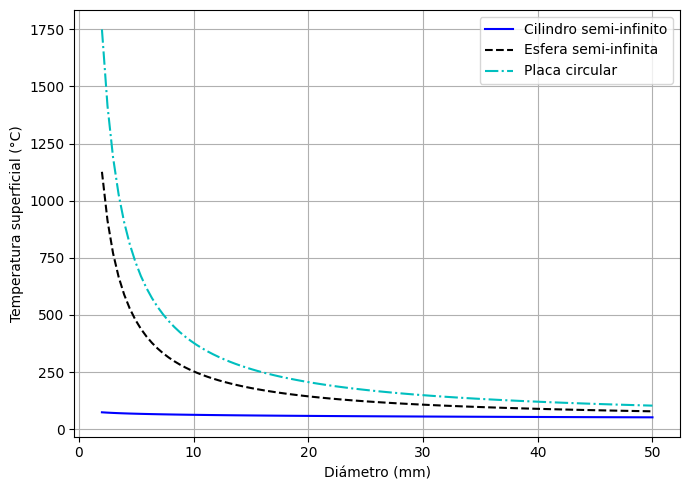

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# FUNCIÓN PRINCIPAL
# ------------------------------------------------------------
def facf():
    # --------------------------
    # Parámetros del ejercicio
    # --------------------------
    k = 7.0          # [W/m·K]
    Q = 48.0         # [W]
    Tinf = 35.0      # [°C]
    L = 0.16         # [m]
    D = 0.007        # [m]

    # --------------------------
    # Factores de forma
    # --------------------------
    Scil = 2 * np.pi * L / np.log(4 * L / D)   # Cilindro semi-infinito
    Sesf = 2 * np.pi * (D / 2)                 # Esfera semi-infinita
    Spla = 4 * (D / 2)                         # Placa circular

    # --------------------------
    # Temperaturas de la superficie
    # --------------------------
    Tcil = Tinf + Q / (k * Scil)
    Tesf = Tinf + Q / (k * Sesf)
    Tpla = Tinf + Q / (k * Spla)

    print(f"Cilindro semi-infinito: T1 = {Tcil:.2f} °C")
    print(f"Esfera semi-infinita:  T1 = {Tesf:.2f} °C")
    print(f"Placa circular:        T1 = {Tpla:.2f} °C")

    # --------------------------
    # Variación con el diámetro
    # --------------------------
    Dvals = np.linspace(0.002, 0.05, 100)  # [m]

    Tcil_vals = Tinf + Q / (k * (2 * np.pi * L / np.log(4 * L / Dvals)))
    Tesf_vals = Tinf + Q / (k * (2 * np.pi * (Dvals / 2)))
    Tpla_vals = Tinf + Q / (k * (4 * (Dvals / 2)))

    # --------------------------
    # Gráfica
    # --------------------------
    plt.figure(figsize=(7,5))
    plt.plot(Dvals * 1000, Tcil_vals, 'b', linewidth=1.5, label='Cilindro semi-infinito')
    plt.plot(Dvals * 1000, Tesf_vals, 'k--', linewidth=1.5, label='Esfera semi-infinita')
    plt.plot(Dvals * 1000, Tpla_vals, 'c-.', linewidth=1.5, label='Placa circular')

    plt.xlabel('Diámetro (mm)')
    plt.ylabel('Temperatura superficial (°C)')
    #plt.title('Variación de T con diferentes factores de forma S')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# EJECUCIÓN
# ------------------------------------------------------------
if __name__ == "__main__":
    facf()


## Ejemplo 5.3.

Convergió en 31 iteraciones
Distribución de temperaturas en nodos interiores:
[[81.81807411 81.72334385 78.88246169 71.59085206]
 [70.54910143 66.19299725 62.21575977 57.48098595]
 [59.18549199 50.28394159 46.30669738 46.11736384]
 [40.90903388 29.45068292 26.60978808 30.68178798]]


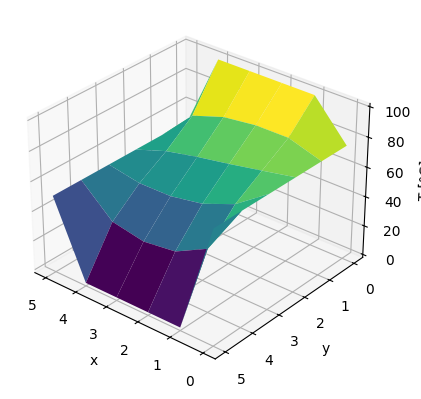

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
Nx = 4
Ny = 4
Ttol = 1e-4
maxIter = 5000

Tsup = 100.0
Tinf = 0.0
Tizq = 75.0
Tder = 50.0

# ----------------------------------------------------------
# Inicialización
# ----------------------------------------------------------
T = np.zeros((Ny + 2, Nx + 2))
T[0, :] = Tsup
T[-1, :] = Tinf
T[:, 0] = Tizq
T[:, -1] = Tder

# ----------------------------------------------------------
# Iteraciones
# ----------------------------------------------------------
for iter in range(1, maxIter + 1):
    T_viejo = T.copy()
    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            T[i, j] = 0.25 * (
                T[i+1, j] +
                T[i-1, j] +
                T[i, j+1] +
                T[i, j-1]
            )
    error = np.max(np.abs(T - T_viejo))
    if error < Ttol:
        print(f'Convergió en {iter} iteraciones')
        break

# ----------------------------------------------------------
# Resultados
# ----------------------------------------------------------
print('Distribución de temperaturas en nodos interiores:')
print(T[1:-1, 1:-1])

# ----------------------------------------------------------
# Gráfica
# ----------------------------------------------------------
x = np.arange(Nx + 2)
y = np.arange(Ny + 2)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T, cmap='viridis')

ax.view_init(elev=30, azim=130)

#ax.set_title('Distribución de temperaturas')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T [°C]')
plt.show()

## Ejemplo 5.4.

q''' = 8.000e+04 W/m^3
T_max (dominio) = 73.6480 °C
T_media (cavidad) = 60.5810 °C


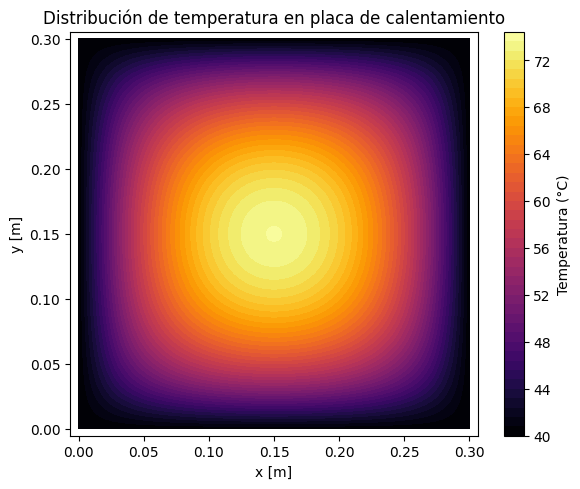

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
L = 0.3        # lado total del bloque [m]
a = 0.25      # lado de la parte de acero  [m]
Nx = 101        # número de nodos en x
Ny = 101        # número de nodos en y
dx = L / (Nx - 1) # delta x
dy = L / (Ny - 1) #delta y

# Propiedades térmicas constantes
k_steel = 15     # [W/m·K]  (acero))
k_mat = 0.25  # [W/m·K]  (material)

# Condiciones de contorno y generación
T_ext = 40.0    # [°C] en el borde exterior
Q_total = 500.0  # [W] generados en el líquido
V_cav = a * a * 0.1        # volumen
q_gen = Q_total / V_cav    # generación uniforme [W/m^3]

# ----------------------------------------------------------
# Malla y condiciones iniciales
# ----------------------------------------------------------


x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y) # creación de la malla

# Inicializamos temperatura
T = np.ones((Ny, Nx)) * T_ext

# Determinamos qué nodos pertenecen a la parte de acero
x_cav_min = (L - a) / 2
x_cav_max = (L + a) / 2
y_cav_min = (L - a) / 2
y_cav_max = (L + a) / 2
masca = (X >= x_cav_min) & (X <= x_cav_max) & (Y >= y_cav_min) & (Y <= y_cav_max)   #máscara booleana que define que nodos hacen parte del bloque de acero inóxidable
# Define las coordenadas con operadores booleanos

# ----------------------------------------------------------
#  Iteración (Gauss-Seidel)
# ----------------------------------------------------------
Ttol = 1e-6
max_iter = 10000

for it in range(max_iter):
    T_old = T.copy()
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):

            # Determinamos qué material está en el nodo central
            if masca[i, j]:
                k = k_steel
                q = q_gen
            else:
                k = k_mat
                q = 0.0

            # Ecuación de diferencias finitas ( k constante localmente)
            T[i, j] = (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] + q * dx**2 / k) / 4

    # Bordes fijos a 25°C
    T[0, :] = T_ext
    T[-1, :] = T_ext
    T[:, 0] = T_ext
    T[:, -1] = T_ext

    # Criterio de convergencia
    err = np.max(np.abs(T - T_old))
    if err < Ttol:
        print(f"Convergencia alcanzada en {it} iteraciones (error={err:.2e})")
        break

# ----------------------------------------------------------
# Resultados numéricos
# ----------------------------------------------------------
T_max = np.max(T)
T_mean_cav = np.mean(T[masca])

print(f"q''' = {q_gen:.3e} W/m^3")
print(f"T_max (dominio) = {T_max:.4f} °C")
print(f"T_media (cavidad) = {T_mean_cav:.4f} °C")

# ----------------------------------------------------------
#  Visualización
# ----------------------------------------------------------
plt.figure(figsize=(6,5))
plt.contourf(X, Y, T, levels=50, cmap='inferno')
plt.colorbar(label='Temperatura (°C)')
plt.title('Distribución de temperatura en placa de calentamiento')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Ejemplo 5.5.1

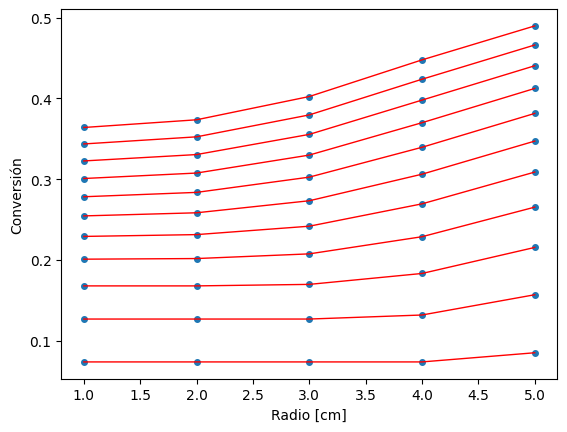

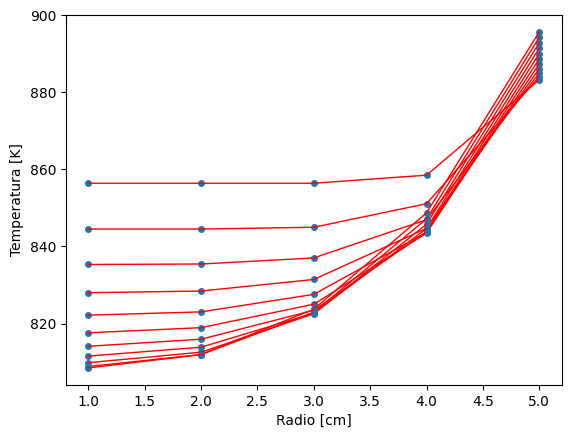

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Condiciones iniciales
# ----------------------------------------------------------

# Conversión inicial (5 nodos radiales)
xv = np.array([0, 0, 0, 0, 0], dtype=float)

# Temperatura inicial [K]
Tv = np.array([873, 873, 873, 873, 883], dtype=float)

# Contador de iteraciones
n = 0

# ----------------------------------------------------------
# Parámetros
# ----------------------------------------------------------

delz = 0.0945
M  = 0.179
Mm = 0.25

# Nodos radiales
j = np.array([1, 2, 3, 4, 5])

# ----------------------------------------------------------
# Matrices de coeficientes
# ----------------------------------------------------------

coefix = np.array([
    [1-4*Mm,        4*Mm,              0,              0,              0],
    [Mm*(1-1/2),    1-2*Mm,     Mm*(1+1/2),              0,              0],
    [0,        Mm*(1-1/4),     1-2*Mm,     Mm*(1+1/4),              0],
    [0,              0,        Mm*(1-1/6),     1-2*Mm,     Mm*(1+1/6)],
    [0,              0,              0, Mm*((1-1/8)+(1+1/8)), 1-2*Mm]
])

coefit = np.array([
    [1-4*M,         4*M,              0,              0,              0],
    [M*(1-1/2),     1-2*M,      M*(1+1/2),              0,              0],
    [0,        M*(1-1/4),      1-2*M,      M*(1+1/4),              0],
    [0,              0,        M*(1-1/6),      1-2*M,      M*(1+1/6)],
    [0,              0,              0,           -0.030,          1.030]
])

# Almacenamiento

x = np.zeros((5, 11))
T = np.zeros((5, 11))

# ----------------------------------------------------------
# Figuras
# ----------------------------------------------------------

plt.figure(1)
plt.xlabel('Radio [cm]')
plt.ylabel('Conversión')
plt.grid(False)

plt.figure(2)
plt.xlabel('Radio [cm]')
plt.ylabel('Temperatura [K]')
plt.grid(False)

# ----------------------------------------------------------
# Bucle principal
# ----------------------------------------------------------

while n < 11:

    # Predicción por difusión radial
    xnr = coefix @ xv
    Tnr = coefit @ Tv

    # Cinética
    K = 0.027 * np.exp(0.021 * (Tv - 773))

    A = (1.2 * xv**2) / (K * (11 + xv)**2)
    B = (1 - xv) / (11 + xv)

    rc = 15100 * np.exp(-11000 / Tv) * (B - A)

    # Términos de reacción
    rx =  169 * delz * rc
    rt = -37900 * delz * rc

    # Condición térmica en el nodo 5
    rt[4] = 0

    # Actualización
    xv = xnr + rx
    Tv = Tnr + rt

    n += 1

    # Guardar resultados
    x[:, n-1] = xv
    T[:, n-1] = Tv


    plt.figure(1)
    plt.plot(j, xv, 'o', color='C0', markersize=4)
    plt.plot(j, xv, 'r', linewidth=1)

    plt.figure(2)
    plt.plot(j, Tv, 'o', color='C0', markersize=4)
    plt.plot(j, Tv, 'r', linewidth=1)

plt.show()

## Ejemplo 5.5.2

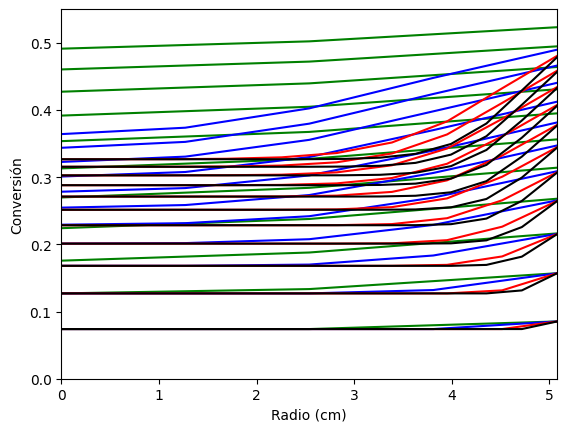

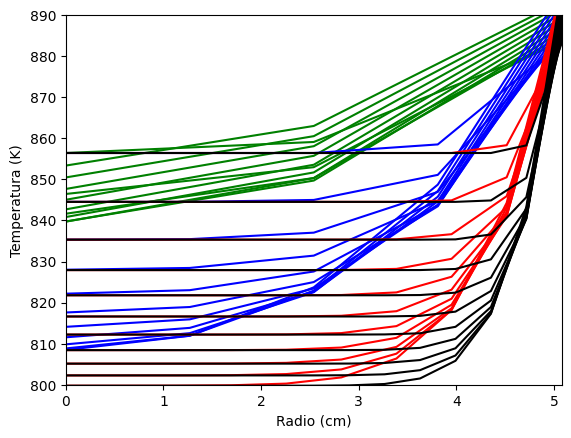

In [ ]:


# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt


nodosr = [3, 5, 10, 15]              # nodos radiales
col = ['g', 'b', 'r', 'k']           # colores

# Figuras
plt.figure(1)
plt.xlabel('Radio (cm)')
plt.ylabel('Conversión')
plt.grid(False)
plt.axis([0, 5.08, 0, 0.55])

plt.figure(2)
plt.xlabel('Radio (cm)')
plt.ylabel('Temperatura (K)')
plt.grid(False)
plt.axis([0, 5.08, 800, 890])

# ----------------------------------------------------------
# bucle
# ----------------------------------------------------------

for t, Nr in enumerate(nodosr):

    # Parámetros del reactor
    D = 10.16               # diámetro del tubo [cm]
    Nz = 11                 # pasos axiales

    xo  = 0.0               # conversión inicial
    To  = 873.0             # temperatura inicial [K]
    To2 = 883.0             # temperatura en la pared [K]

    delz = 0.0945
    delr = D / (2 * (Nr - 1))

    M  = 0.179
    Mm = 0.25

    # Inicialización
    xv = xo * np.ones(Nr)
    Tv = To * np.ones(Nr)
    Tv[-1] = To2             # condición de pared

    coefix = np.zeros((Nr, Nr))
    coefit = np.zeros((Nr, Nr))


   # ----------------------------------------------------------
   # Matrices de difusión
   # ----------------------------------------------------------

    for i in range(Nr):

        # Nodo central
        if i == 0:
            coefix[i, i]   = 1 - 4 * Mm
            coefix[i, i+1] = 4 * Mm

            coefit[i, i]   = 1 - 4 * M
            coefit[i, i+1] = 4 * M

        # Nodos internos
        elif i < Nr - 1:
            coefix[i, i-1] = Mm * (1 - 1 / (2 * i))
            coefix[i, i]   = 1 - 2 * Mm
            coefix[i, i+1] = Mm * (1 + 1 / (2 * i))

            coefit[i, i-1] = M * (1 - 1 / (2 * i))
            coefit[i, i]   = 1 - 2 * M
            coefit[i, i+1] = M * (1 + 1 / (2 * i))

        # Nodo de la pared
        else:
            coefix[i, i]   = 1 - 2 * Mm
            coefix[i, i-1] = Mm * ((1 - 1 / (2 * i)) + (1 + 1 / (2 * i)))

            coefit[i, i]   = 1.030
            coefit[i, i-1] = -0.030

    # Coordenada radial
    r = np.arange(Nr) * delr

    # ----------------------------------------------------------
    # Bucle axial
    # ----------------------------------------------------------

    for _ in range(Nz):

        # Difusión radial
        xnr = coefix @ xv
        Tnr = coefit @ Tv

        # Cinética
        K  = 0.027 * np.exp(0.021 * (Tv - 773))
        A  = (1.2 * xv**2) / (K * (11 + xv)**2)
        B  = (1 - xv) / (11 + xv)
        rc = 15100 * np.exp(-11000 / Tv) * (B - A)

        # Términos de reacción
        rx =  169 * delz * rc
        rt = -37900 * delz * rc
        rt[-1] = 0            # condición térmica en la pared

        # Actualización
        xv = xnr + rx
        Tv = Tnr + rt

        # Gráficas
        plt.figure(1)
        plt.plot(r, xv, col[t])

        plt.figure(2)
        plt.plot(r, Tv, col[t])

plt.show()

## Ejemplo 5.5.3

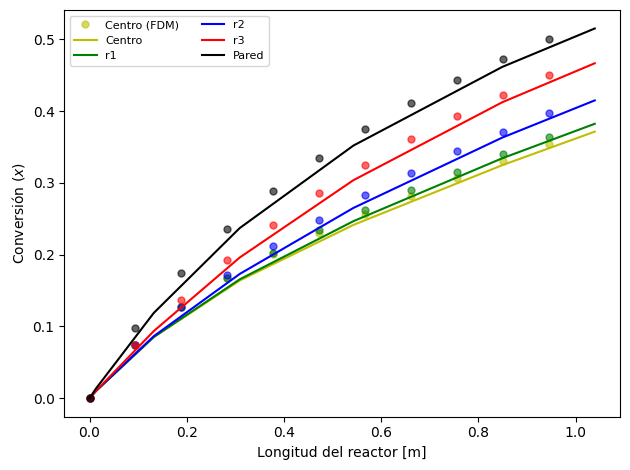

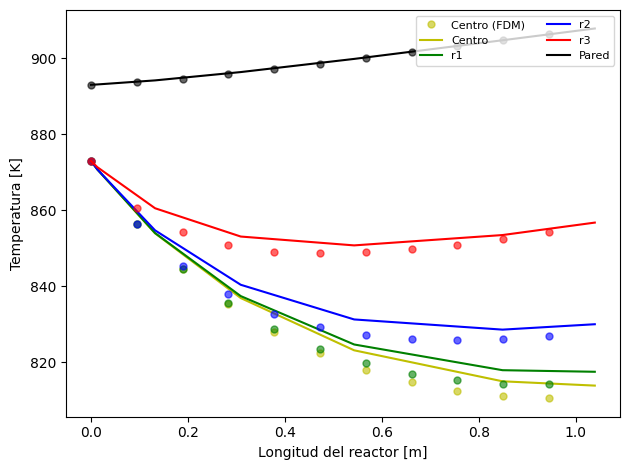

In [ ]:

# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



# ----------------------------------------------------------
# Modelo por diferencias finitas
# ----------------------------------------------------------

# Parámetros Generales
nodosr = 5                    # Nodos radiales
col = ['y', 'g', 'b', 'r', 'k'] # Colores (amarillo, verde, azul, rojo, negro)

# Geometría y Malla
D = 10.16                     # Diámetro [cm]
r_nodos = nodosr
s_pasos = 11                  # Nodos axiales
xo = 0.0                      # Conversión inicial
To = 873.0                    # Temperatura inicial [K]
To2 = 893.0                   # Temperatura pared [K]

delz = 0.0945                 # Paso axial

delr = D / (2 * (r_nodos - 1))

# Parámetros Adimensionales
M = 0.179
Mm = 0.25

# Inicialización de vectores
x_mat = np.zeros((r_nodos, s_pasos))
T_mat = np.zeros((r_nodos, s_pasos))

# Condiciones Iniciales
x_mat[:, 0] = xo
T_mat[:, 0] = To
T_mat[-1, 0] = To2 # Pared

# Vectores de trabajo para el bucle
xv = x_mat[:, 0].copy()
Tv = T_mat[:, 0].copy()


# ----------------------------------------------------------
# Contrucción de matrices
# ----------------------------------------------------------


coefix = np.zeros((r_nodos, r_nodos))
coefit = np.zeros((r_nodos, r_nodos))


# ----------------------------------------------------------
# Bucle
# ----------------------------------------------------------
for i in range(r_nodos):

    #  NODO CENTRAL
    if i == 0:
        coefix[i, i]   = 1 - 4 * Mm
        coefix[i, i+1] = 4 * Mm

        coefit[i, i]   = 1 - 4 * M
        coefit[i, i+1] = 4 * M

    #NODOS INTERNOS
    elif i < r_nodos - 1:

        coefix[i, i-1] = Mm * (1 - 1/(2*i))
        coefix[i, i]   = 1 - 2 * Mm
        coefix[i, i+1] = Mm * (1 + 1/(2*i))

        coefit[i, i-1] = M * (1 - 1/(2*i))
        coefit[i, i]   = 1 - 2 * M
        coefit[i, i+1] = M * (1 + 1/(2*i))

    #  NODO PARED
    else:
        # Condición de pared para matriz X
        coefix[i, i]   = 1 - 2 * Mm
        coefix[i, i-1] = Mm * ((1 - 1/(2*i)) + (1 + 1/(2*i)))

        # Condición de pared para matriz T
        coefit[i, i]   = 1.030
        coefit[i, i-1] = -0.030


# ----------------------------------------------------------
# Bucle
# ----------------------------------------------------------
n = 1
while n < s_pasos:
    #  Difusión Radial
    xnr = coefix @ xv
    Tnr = coefit @ Tv

    # Cinética
    K = 0.027 * np.exp(0.021 * (Tv - 773))
    A = (1.2 * xv**2) / (K * (11 + xv)**2)
    B = (1 - xv) / (11 + xv)
    rc = 15100 * np.exp(-11000 / Tv) * (B - A)
    rx = 169 * delz * rc
    rt = -37900 * delz * rc
    rt[-1] = 0 # Condición pared

    # Actualización
    xn = xnr + rx
    Tn = Tnr + rt

    xv = xn
    Tv = Tn

    # Guardar
    x_mat[:, n] = xn
    T_mat[:, n] = Tn
    n += 1

# Eje axial
z_manual = np.arange(s_pasos) * delz


# ----------------------------------------------------------
# Modelo ODE
# ----------------------------------------------------------

def modelo_derivadas(t, y, coefix, coefit, delz):
    # Desempaquetar
    mitad = len(y) // 2
    xv = y[:mitad]
    Tv = y[mitad:]


# ----------------------------------------------------------
# Parte Difusiva
# ----------------------------------------------------------


    diff_x = (coefix @ xv - xv) / delz
    diff_t = (coefit @ Tv - Tv) / delz


# ----------------------------------------------------------
# Parte reactiva
# ----------------------------------------------------------
    K = 0.027 * np.exp(0.021 * (Tv - 773))
    A = (1.2 * xv**2) / (K * (11 + xv)**2)
    B = (1 - xv) / (11 + xv)
    rc = 15100 * np.exp(-11000 / Tv) * (B - A)

    # Derivadas
    drx = 169 * rc
    drt = -37900 * rc
    drt[-1] = 0 # Pared

    # Derivada Total
    dx_dz = diff_x + drx
    dT_dz = diff_t + drt

    return np.concatenate([dx_dz, dT_dz])


L_total = s_pasos * delz
y0 = np.concatenate([x_mat[:,0], T_mat[:,0]]) # Estado inicial

# Resolver
sol = solve_ivp(
    fun=modelo_derivadas,
    t_span=[0, L_total],
    y0=y0,
    args=(coefix, coefit, delz),
    method='RK45' # Similar a ode45
)

z_ode = sol.t
x_ode = sol.y[:r_nodos, :]
T_ode = sol.y[r_nodos:, :]


# ----------------------------------------------------------
# Gráficos
# ----------------------------------------------------------

# --- Figura 1: Conversión ---
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Longitud del reactor [m]')
ax1.set_ylabel('Conversión ($x$)')

# --- Figura 2: Temperatura ---
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Longitud del reactor [m]')
ax2.set_ylabel('Temperatura [K]')


# ----------------------------------------------------------
# Bucle para graficar
# ----------------------------------------------------------
etiquetas_nodos = ['Centro', 'r1', 'r2', 'r3', 'Pared']

for h in range(r_nodos):
    c = col[h % len(col)]
    lbl = etiquetas_nodos[h]

    # 1. Datos Manuales
    ax1.plot(z_manual, x_mat[h, :], 'o', color=c, markersize=5, alpha=0.6, label=f'{lbl} (FDM)' if h==0 else "")
    ax2.plot(z_manual, T_mat[h, :], 'o', color=c, markersize=5, alpha=0.6, label=f'{lbl} (FDM)' if h==0 else "")

    # 2. Datos ODE
    ax1.plot(z_ode, x_ode[h, :], '-', color=c, linewidth=1.5, label=f'{lbl}' if h<5 else "")
    ax2.plot(z_ode, T_ode[h, :], '-', color=c, linewidth=1.5, label=f'{lbl}' if h<5 else "")

# Ajustes finales Figura 1
ax1.grid(False)
ax1.legend(loc='upper left', ncol=2, fontsize=8)
fig1.tight_layout()


# Ajustes finales Figura 2
ax2.grid(False)
ax2.legend(loc='upper right', ncol=2, fontsize=8)
fig2.tight_layout()


plt.show()

